In [76]:
import numpy as np
from numpy.core.fromnumeric import std
from scipy.stats.stats import ttest_ind

np.random.seed(42)
# create array of controllgroup
controll_group_f = np.random.randint(0, 100, (1, 50), dtype=np.int32)
controll_group_m = np.random.randint(0, 100, (1, 50), dtype=np.int32)

# create array of errorgroup
controll_error_f = np.random.randint(0, 100, (1, 50), dtype=np.int32)
controll_error_m = np.random.randint(0, 100, (1, 50), dtype=np.int32)

# calc standart deviation and mean
gf = (np.mean(controll_group_f), np.std(controll_group_f))
gm = (np.mean(controll_group_m), np.std(controll_group_m))
ef = (np.mean(controll_error_f), np.std(controll_error_f))
em = (np.mean(controll_error_m), np.std(controll_error_m))

print(f"The mean of the controllgroup (50f): {gf[0]} with an SD: {gf[1]}")
print(f"The mean of the controllgroup (50m): {gm[0]} with an SD: {gm[1]}")
print(f"The mean of the errorgroup (50f): {ef[0]} with an SD: {ef[1]}")
print(f"The mean of the errorgroup (50m): {em[0]} with an SD: {em[1]}")

# calc t-test
nw = np.c_[controll_group_f,controll_group_m]

a = ttest_ind(
    nw,np.c_[controll_error_f,controll_error_m], 1
)
print(
    f"The values for controllgroup (50f/50m) vs errorgroup (50f/50m) are t-value: {a[0]} and p-value: {a[1]}"
)

# controll with in the groups
b = ttest_ind(controll_group_f, controll_group_m, 1)
c = ttest_ind(controll_error_f, controll_error_m, 1)
print(
    f"The values for controllgroup (50f) vs controllgroup (50m) are t-value: {b[0]} and p-value: {b[1]}"
)
print(
    f"The values for errorgroup (50f) vs errorgroup (50m) are t-value: {c[0]} and p-value: {c[1]}"
)


# values between the groups same sex
d = ttest_ind(controll_group_f, controll_error_f, 1)
e = ttest_ind(controll_group_m, controll_error_m, 1)

print(
    f"The values for controllgroup (50f) vs errorgroup (50f) are t-value: {d[0]} and p-value: {d[1]}"
)
print(
    f"The values for controllgroup (50m) vs errorgroup (50m) are t-value: {e[0]} and p-value: {e[1]}"
)

# values between the groups not same sex
f = ttest_ind(controll_group_f, controll_error_m, 1)
g = ttest_ind(controll_group_m, controll_error_f, 1)

print(
    f"The values for controllgroup (50f) vs errorgroup (50m) are t-value: {f[0]} and p-value: {f[1]}"
)
print(
    f"The values for controllgroup (50m) vs errorgroup (50f) are t-value: {g[0]} and p-value: {g[1]}"
)


The mean of the controllgroup (50f): 50.84 with an SD: 27.849854577717277
The mean of the controllgroup (50m): 50.24 with an SD: 30.637597817061312
The mean of the errorgroup (50f): 45.2 with an SD: 30.93283045568252
The mean of the errorgroup (50m): 49.76 with an SD: 28.4953048764178
The values for controllgroup (50f/50m) vs errorgroup (50f/50m) are t-value: [0.72847174] and p-value: [0.46718555]
The values for controllgroup (50f) vs controllgroup (50m) are t-value: [0.1014399] and p-value: [0.91940852]
The values for errorgroup (50f) vs errorgroup (50m) are t-value: [-0.75896329] and p-value: [0.44969614]
The values for controllgroup (50f) vs errorgroup (50f) are t-value: [0.94851944] and p-value: [0.34519825]
The values for controllgroup (50m) vs errorgroup (50m) are t-value: [0.08030457] and p-value: [0.93615879]
The values for controllgroup (50f) vs errorgroup (50m) are t-value: [0.18973685] and p-value: [0.84990778]
The values for controllgroup (50m) vs errorgroup (50f) are t-val

(1, 50)


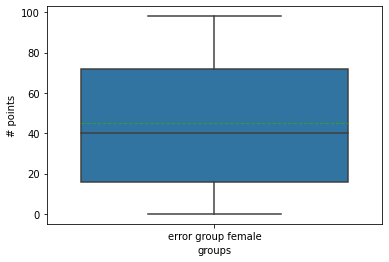

In [32]:
import seaborn as sns
import pandas as pd

print(controll_error_f.shape)

new = np.transpose(controll_error_f, (1, 0))
dataframe = pd.DataFrame(new, columns=["error group female"])

box = sns.boxplot(data=dataframe, showmeans=True,meanline=True)
box.set(xlabel="groups", ylabel="# points")
figg = box.get_figure()
figg.savefig("test.png")

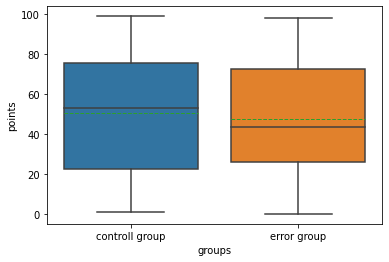

In [81]:
import matplotlib as plt
import seaborn as sns
import pandas as pd

err = np.c_[controll_error_f, controll_error_m]
sav = np.c_[controll_group_f,controll_group_m]
err = np.transpose(err, (1,0))
sav = np.transpose(sav,(1,0))
con = np.concatenate((sav,err), axis=1)
dates = pd.DataFrame(con,  columns=["controll group", "error group"])


experiment = sns.boxplot(data=dates, showmeans=True,meanline=True)
experiment.set(xlabel="groups", ylabel="points")
experiment.plot()
figg = experiment.get_figure()
figg.savefig("all.png")




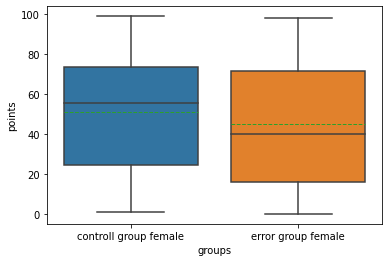

In [82]:
controllgroup = np.transpose(controll_group_f, (1, 0))
errorgroup = np.transpose(controll_error_f, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group female", "error group female"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("female.png")

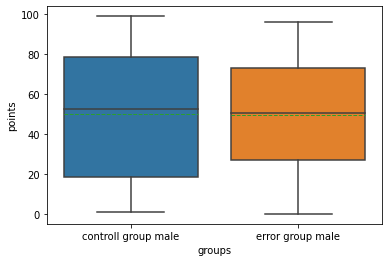

In [83]:

controllgroup = np.transpose(controll_group_m, (1, 0))
errorgroup = np.transpose(controll_error_m, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group male", "error group male"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("male.png")


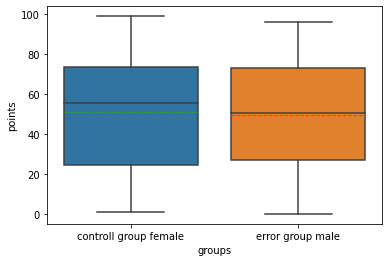

In [84]:
controllgroup = np.transpose(controll_group_f, (1, 0))
errorgroup = np.transpose(controll_error_m, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group female", "error group male"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("fsav_merr.png")

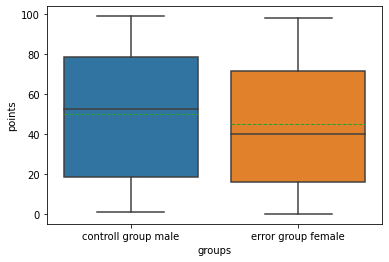

In [85]:
controllgroup = np.transpose(controll_group_m, (1, 0))
errorgroup = np.transpose(controll_error_f, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group male", "error group female"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("msav_ferr.png")

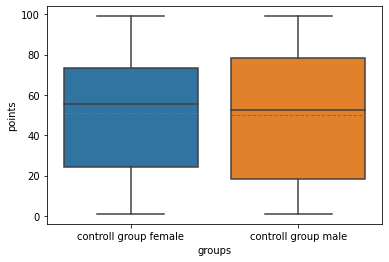

In [86]:
controllgroup = np.transpose(controll_group_f, (1, 0))
errorgroup = np.transpose(controll_group_m, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group female", "controll group male"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("fsav_msav.png")

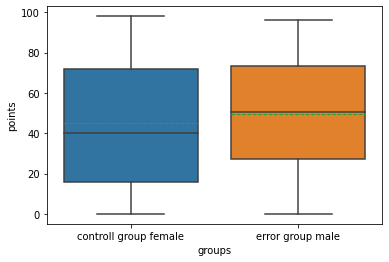

In [87]:
controllgroup = np.transpose(controll_error_f, (1, 0))
errorgroup = np.transpose(controll_error_m, (1, 0))
con = np.concatenate((controllgroup,errorgroup), axis=1)
dates = pd.DataFrame(con,  columns=["controll group female", "error group male"])
fem = sns.boxplot(data=dates, showmeans=True,meanline=True)
fem.set(xlabel="groups", ylabel="points")
fem.plot()
figg = fem.get_figure()
figg.savefig("ferr_merr.png")